<a href="https://colab.research.google.com/github/sankarraman2000/Data-analytics/blob/main/Titanic_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Titanic - Machine Learning from Disaster**
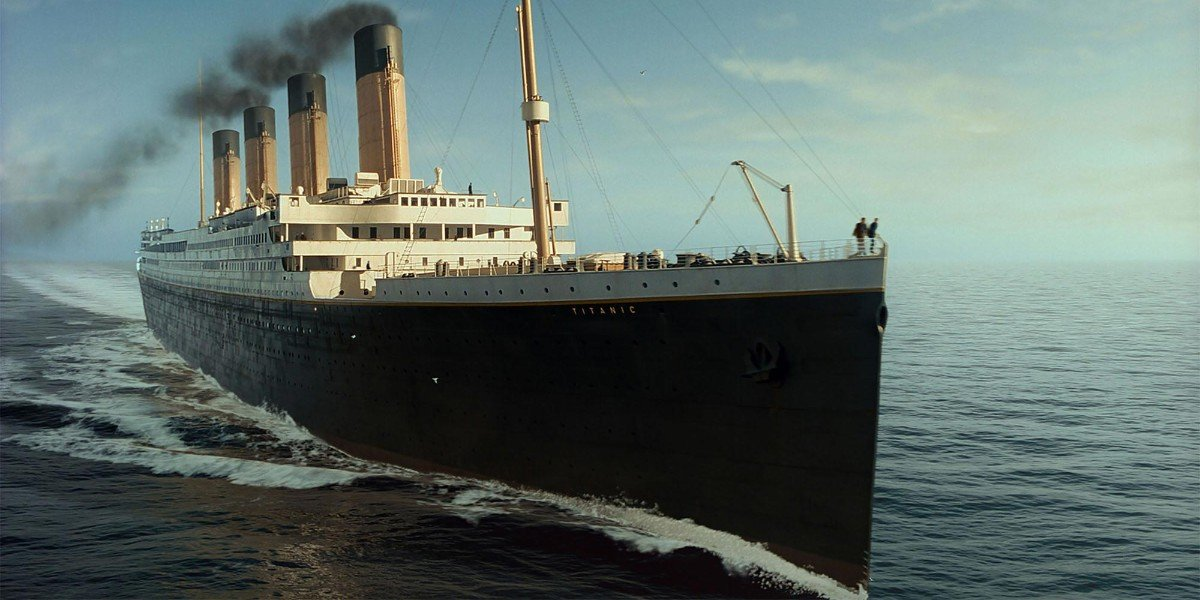

**The goal of this competition is create a model that predicts which passengers survived the Titanic shipwreck.**

*Machine learning enables a machine to automatically learn from data, improve performance from experiences, and predict things without being explicitly programmed.I use logistic regression algorithm for this competition. LogisticRegression is one of the machine learning algorithm*

*LogisticRegression comes under Supervised Learning. Supervised Learning is when the algorithm learns on a labeled dataset and analyses the training data. These labeled data sets have inputs and expected outputs.*
*Supervised learning can be further split into classification and regression.*

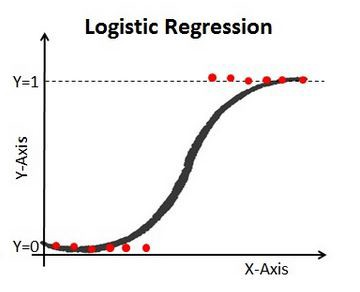

Reference :[sklearn LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Reference :[GeeksforGeeks](https://https://www.geeksforgeeks.org/understanding-logistic-regression/?ref=lbp)



  1.Importing Libraries

  2.Load the Data

  3.Data Analysis and Visualization

  4.Data Moduling

  5.Train Test Split the data

  6.predict the Value

  7.Final Submission

**1.Importing Libraries**

In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

**2.Load the dataset**

In [165]:
titanic_data=pd.read_csv("/content/train.csv")
test_data=pd.read_csv("/content/test.csv")
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [198]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [167]:
titanic_data.shape

(891, 12)

In [168]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [169]:
def columns(a):
    for col in a.columns:
        print(col)
columns(titanic_data)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


**3.Data Analysis and Visualization**

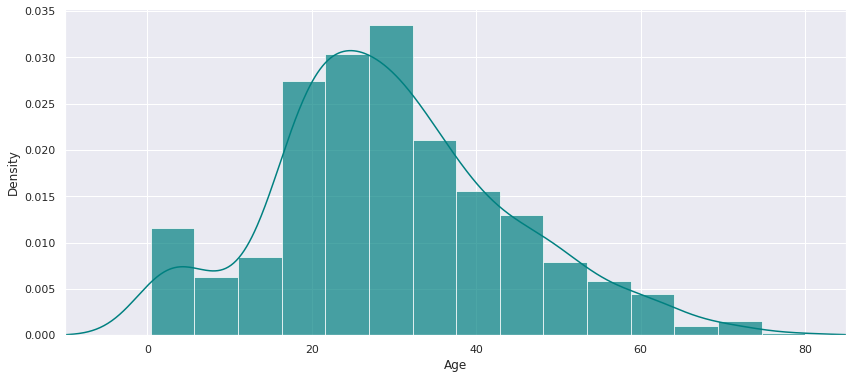

In [170]:
sns.set()
plt.figure(figsize=(14,6))
ax = titanic_data["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.7)
titanic_data["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

**People in the age group of 20 to 40 years have traveled the most.**

In [171]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

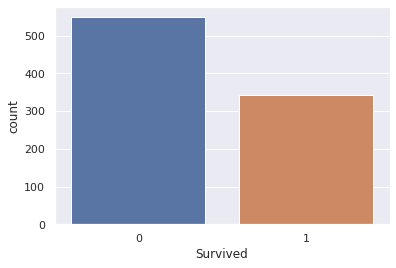

In [172]:
sns.countplot(x='Survived',data=titanic_data)

In [173]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

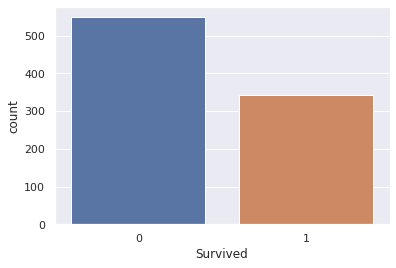

In [174]:
sns.countplot(x='Survived',data=titanic_data)

Survival Rate of Female and Male

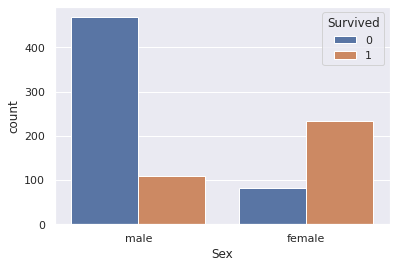

In [175]:
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

In [176]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

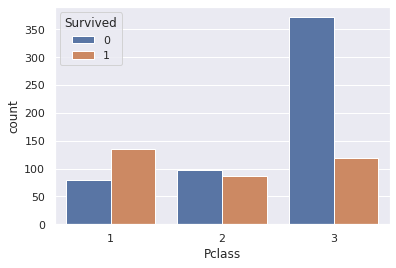

In [177]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)

**Here in all classes more women have survived**

**4.Data Moduling**

In [178]:
titanic_len=len(titanic_data)
df=pd.concat([titanic_data,test_data],axis=0)
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [179]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Age','Embarked']
laen=LabelEncoder()
for col in cols:
    titanic_data[col]=laen.fit_transform(titanic_data[col])

In [180]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

**Null values found in 3 columns**

   1.   age 

   2.   Cabin

   3.   Embarked 
   
Delete all cabin columns and find the average value for age and fill it with null value, fill it whichever value is higher for Embarked

    Mean value :  29.69911764705882
    
    Whichever value occurs more times : S

In [181]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.drop(columns=['Cabin'],axis=1,inplace=True)

In [182]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [183]:
df=df.drop(columns=['Name','Ticket'],axis=1)
df.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.000000,1,0,7.2500,S
1,2,1.0,1,female,38.000000,1,0,71.2833,C
2,3,1.0,3,female,26.000000,0,0,7.9250,S
3,4,1.0,1,female,35.000000,1,0,53.1000,S
4,5,0.0,3,male,35.000000,0,0,8.0500,S
5,6,0.0,3,male,29.881138,0,0,8.4583,Q
6,7,0.0,1,male,54.000000,0,0,51.8625,S


In [184]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
laen=LabelEncoder()
for col in cols:
    df[col]=laen.fit_transform(df[col])
df.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.000000,1,0,7.2500,2
1,2,1.0,1,0,38.000000,1,0,71.2833,0
2,3,1.0,3,0,26.000000,0,0,7.9250,2
3,4,1.0,1,0,35.000000,1,0,53.1000,2
4,5,0.0,3,1,35.000000,0,0,8.0500,2
5,6,0.0,3,1,29.881138,0,0,8.4583,1
6,7,0.0,1,1,54.000000,0,0,51.8625,2


In [185]:
train_axis=df.iloc[:titanic_len,:]
test_axis=df.iloc[titanic_len:,:]

In [186]:
test_axis.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,NaN,3,1,34.5,0,0,7.8292,1
1,893,NaN,3,0,47.0,1,0,7.0000,2
2,894,NaN,2,1,62.0,0,0,9.6875,1
3,895,NaN,3,1,27.0,0,0,8.6625,2
4,896,NaN,3,0,22.0,1,1,12.2875,2
5,897,NaN,3,1,14.0,0,0,9.2250,2
6,898,NaN,3,0,30.0,0,0,7.6292,1


In [187]:
train_axis.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.000000,1,0,7.2500,2
1,2,1.0,1,0,38.000000,1,0,71.2833,0
2,3,1.0,3,0,26.000000,0,0,7.9250,2
3,4,1.0,1,0,35.000000,1,0,53.1000,2
4,5,0.0,3,1,35.000000,0,0,8.0500,2
5,6,0.0,3,1,29.881138,0,0,8.4583,1
6,7,0.0,1,1,54.000000,0,0,51.8625,2


In [188]:
x_axis=train_axis.drop(columns=['PassengerId','Survived'])
y_axis=train_axis['Survived']
y_axis.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

**5.Train Test Split the data**


In [189]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
def classif(model):
    x_train, x_test, y_train, y_test = train_test_split(x_axis, y_axis, test_size=0.30, random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy : ',model.score(x_test,y_test))
    score=cross_val_score(model,x_axis,y_axis,cv=5)
    print('CV Score : ',np.mean(score))

In [190]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classif(model)

Accuracy :  0.8134328358208955
CV Score :  0.786761659657272


In [191]:
model=LogisticRegression()
model.fit(x_axis,y_axis)

LogisticRegression()

In [192]:
test_axis.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,NaN,3,1,34.5,0,0,7.8292,1
1,893,NaN,3,0,47.0,1,0,7.0000,2
2,894,NaN,2,1,62.0,0,0,9.6875,1
3,895,NaN,3,1,27.0,0,0,8.6625,2
4,896,NaN,3,0,22.0,1,1,12.2875,2
5,897,NaN,3,1,14.0,0,0,9.2250,2
6,898,NaN,3,0,30.0,0,0,7.6292,1


In [193]:
x_test=test_axis.drop(columns=['PassengerId','Survived'],axis=1)

In [194]:
x_test.head(7)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
5,3,1,14.0,0,0,9.2250,2
6,3,0,30.0,0,0,7.6292,1


**6.predict  the Value**

In [195]:
predi=model.predict(x_test)
predi

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

**7.Final Submission**

In [196]:
sub=pd.read_csv('/content/gender_submission.csv')
sub.head(8)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0


In [197]:
sub.to_csv('./submission.csv',index=False)
print('submission completed successfully')

submission completed successfully
